In [1]:
import pandas as pd
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

import matplotlib.pyplot as plt
from pathlib import Path
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn import linear_model

In [2]:
draft_df = pd.read_csv('Resources/draft.csv')
game_df = pd.read_csv('Resources/gameParticipation.csv')
player_df = pd.read_csv('Resources/players.csv')

In [3]:
game_df.head()

,gamePartId,gameId,teamId,playerId,gamePartUnit,gamePartSnapCount,nameFirst,nameLast,nameFull,position,...,dob,ageAtDraft,playerProfileUrl,homeCity,homeState,homeCountry,highSchool,hsCity,hsState,hsCountry
0,12100001,56473,3800,20140091,offense,39,John,Brown,John Brown,WR,...,1990-04-03,24.112329,http://www.nfl.com/player/JohnBrown/2543847/pr...,Homestead,FL,USA,Homestead HS,NaN,FL,USA
1,12100002,56473,3800,20100645,offense,33,John,Estes,John Estes,C,...,1987-03-25,23.093151,http://www.nfl.com/player/JohnEstes/2507981/pr...,Stockton,CA,USA,St. Mary's HS,Stockton,CA,USA
2,12100003,56473,3800,20120112,offense,30,Bobby,Massie,Bobby Massie,OT,...,1989-08-01,22.750685,http://www.nfl.com/player/BobbyMassie/2533543/...,Lynchburg,VA,USA,Hargrave Military Academy,Chatham,VA,USA
3,12100004,56473,3800,20100205,offense,30,Ted,Larsen,Ted Larsen,OG,...,1987-06-13,22.873973,http://www.nfl.com/player/TedLarsen/497026/pro...,Miami,FL,USA,Palm Harbor University HS,NaN,FL,USA
4,12100005,56473,3800,20090213,offense,30,Paul,Fanaika,Paul Fanaika,OG,...,1986-04-09,23.060274,http://www.nfl.com/player/PaulFanaika/71293/pr...,San Mateo,CA,USA,Mills HS,Millbrae,CA,USA


In [4]:
game_df.count()

gamePartId           423185
gameId               423185
teamId               423185
playerId             423185
gamePartUnit         423185
gamePartSnapCount    423185
nameFirst            423113
nameLast             423113
nameFull             423113
position             423113
collegeId            423113
nflId                423113
combineId            269552
college              423113
heightInches         423113
weight               423113
dob                  420516
ageAtDraft           420516
playerProfileUrl     423113
homeCity             364929
homeState            357506
homeCountry          366221
highSchool           342982
hsCity               212400
hsState              340780
hsCountry            342982
dtype: int64

In [5]:
playerids_from_game_df = game_df['playerId'].drop_duplicates()
playerids_from_game_df

0         20140091
1         20100645
2         20120112
3         20100205
4         20090213
            ...   
348714    20160621
348784    20191181
351741    20181249
352308    20191193
362958    20180227
Name: playerId, Length: 5827, dtype: int64

In [6]:
players_df = playerids_from_game_df.to_frame()
players_df

,playerId
0,20140091
1,20100645
2,20120112
3,20100205
4,20090213
...,...
348714,20160621
348784,20191181
351741,20181249
352308,20191193


In [7]:
draft_df.head()

,playerId,draft,round,pick,draftTradeValue,draftTeam,position,teamId,nameFirst,nameLast,...,dob,ageAtDraft,playerProfileUrl,homeCity,homeState,homeCountry,highSchool,hsCity,hsState,hsCountry
0,19770001,1977,1.0,1,3000.0,TB,RB,4900,Ricky,Bell,...,1955-04-08,22.084932,http://www.nfl.com/player/RickyBell/2509366/pr...,Houston,TX,USA,NaN,NaN,NaN,NaN
1,19770002,1977,1.0,2,2600.0,DAL,RB,1200,Tony,Dorsett,...,1954-04-07,23.087671,http://www.nfl.com/player/TonyDorsett/2513084/...,Rochester,PA,USA,NaN,NaN,NaN,NaN
2,19770003,1977,1.0,3,2200.0,CIN,DE,920,Eddie,Edwards,...,1954-04-25,23.038356,http://www.nfl.com/player/EddieEdwards/2513479...,Sumter,SC,USA,NaN,NaN,NaN,NaN
3,19770004,1977,1.0,4,1800.0,NYJ,OT,3430,Marvin,Powell,...,1955-08-30,21.690411,http://www.nfl.com/player/MarvinPowell/2523462...,Los Angeles,CA,USA,NaN,NaN,NaN,NaN
4,19770005,1977,1.0,5,1700.0,NYG,DE,3410,Gary,Jeter,...,1955-01-24,22.287671,http://www.nfl.com/player/GaryJeter/2517530/pr...,Weirton,WV,USA,NaN,NaN,NaN,NaN


In [8]:
draft_df.count()

playerId            12140
draft               12140
round               11879
pick                12140
draftTradeValue     12140
draftTeam           12140
position            12140
teamId              12140
nameFirst           12140
nameLast            12140
nameFull            12140
collegeId           12140
nflId               10889
combineId            6693
college             12140
heightInches         9554
weight               9554
dob                 10883
ageAtDraft          10883
playerProfileUrl    10889
homeCity             9788
homeState            9576
homeCountry          9841
highSchool           4320
hsCity               2367
hsState              4300
hsCountry            4320
dtype: int64

In [9]:
combined_df = game_df.join(draft_df, on='playerId', rsuffix='_other')
combined_df

,gamePartId,gameId,teamId,playerId,gamePartUnit,gamePartSnapCount,nameFirst,nameLast,nameFull,position,...,dob_other,ageAtDraft_other,playerProfileUrl_other,homeCity_other,homeState_other,homeCountry_other,highSchool_other,hsCity_other,hsState_other,hsCountry_other
0,12100001,56473,3800,20140091,offense,39,John,Brown,John Brown,WR,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,12100002,56473,3800,20100645,offense,33,John,Estes,John Estes,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,12100003,56473,3800,20120112,offense,30,Bobby,Massie,Bobby Massie,OT,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,12100004,56473,3800,20100205,offense,30,Ted,Larsen,Ted Larsen,OG,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,12100005,56473,3800,20090213,offense,30,Paul,Fanaika,Paul Fanaika,OG,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
423180,6591996,58152,200,20160430,special teams,21,Sharrod,Neasman,Sharrod Neasman,DB,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
423181,6591997,58152,200,20130243,special teams,21,Kemal,Ishmael,Kemal Ishmael,DB,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
423182,6591998,58152,200,20170783,special teams,13,Younghoe,Koo,Younghoe Koo,K,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
423183,6591999,58152,200,20130583,special teams,8,Ryan,Allen,Ryan Allen,P,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
combined_df.columns

Index(['gamePartId', 'gameId', 'teamId', 'playerId', 'gamePartUnit',
       'gamePartSnapCount', 'nameFirst', 'nameLast', 'nameFull', 'position',
       'collegeId', 'nflId', 'combineId', 'college', 'heightInches', 'weight',
       'dob', 'ageAtDraft', 'playerProfileUrl', 'homeCity', 'homeState',
       'homeCountry', 'highSchool', 'hsCity', 'hsState', 'hsCountry',
       'playerId_other', 'draft', 'round', 'pick', 'draftTradeValue',
       'draftTeam', 'position_other', 'teamId_other', 'nameFirst_other',
       'nameLast_other', 'nameFull_other', 'collegeId_other', 'nflId_other',
       'combineId_other', 'college_other', 'heightInches_other',
       'weight_other', 'dob_other', 'ageAtDraft_other',
       'playerProfileUrl_other', 'homeCity_other', 'homeState_other',
       'homeCountry_other', 'highSchool_other', 'hsCity_other',
       'hsState_other', 'hsCountry_other'],
      dtype='object')

In [11]:
#help from Trent
total_games = combined_df.value_counts(subset='playerId')
total_games

playerId
20090032    1952
20110239    1728
20120669     960
20190099     480
20100027     344
            ... 
20150534       1
20170895       1
20150572       1
20170928       1
20160942       1
Length: 5827, dtype: int64

In [12]:
number_of_games = total_games.to_frame()
number_of_games

,0
playerId,
20090032,1952
20110239,1728
20120669,960
20190099,480
20100027,344
...,...
20150534,1
20170895,1
20150572,1


In [13]:
#rename columns:
number_of_games.rename(columns={0 :'Games Played'}, inplace=True)
number_of_games

,Games Played
playerId,
20090032,1952
20110239,1728
20120669,960
20190099,480
20100027,344
...,...
20150534,1
20170895,1
20150572,1


In [14]:
Player_IDs = combined_df['playerId'].drop_duplicates()
Player_IDs

0         20140091
1         20100645
2         20120112
3         20100205
4         20090213
            ...   
348714    20160621
348784    20191181
351741    20181249
352308    20191193
362958    20180227
Name: playerId, Length: 5827, dtype: int64

In [15]:
Players_df = Player_IDs.to_frame()
Players_df

,playerId
0,20140091
1,20100645
2,20120112
3,20100205
4,20090213
...,...
348714,20160621
348784,20191181
351741,20181249
352308,20191193


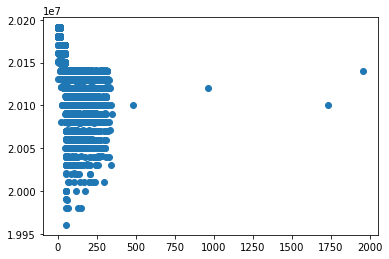

In [16]:
#plot total games by player ID
plt.scatter(number_of_games, Players_df)

In [17]:
players_and_picks = Players_df.join(number_of_games, on = 'playerId')
players_and_picks

,playerId,Games Played
0,20140091,134
1,20100645,15
2,20120112,275
3,20100205,208
4,20090213,108
...,...,...
348714,20160621,6
348784,20191181,2
351741,20181249,4
352308,20191193,2


In [18]:
#rename Columns
players_and_picks.rename(columns={'Games Played' :'Pick'}, inplace=True)
players_and_picks

,playerId,Pick
0,20140091,134
1,20100645,15
2,20120112,275
3,20100205,208
4,20090213,108
...,...,...
348714,20160621,6
348784,20191181,2
351741,20181249,4
352308,20191193,2


In [19]:
draft_analysis_df = players_and_picks.join(number_of_games, on = 'playerId')
draft_analysis_df

,playerId,Pick,Games Played
0,20140091,134,134
1,20100645,15,15
2,20120112,275,275
3,20100205,208,208
4,20090213,108,108
...,...,...,...
348714,20160621,6,6
348784,20191181,2,2
351741,20181249,4,4
352308,20191193,2,2


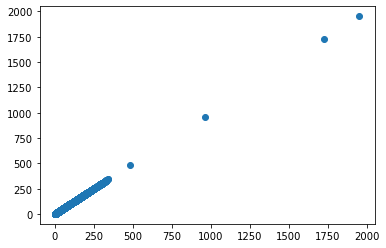

In [20]:
#plot games vs pick
plt.scatter(draft_analysis_df['Pick'], draft_analysis_df['Games Played'])

In [21]:
no_outliers_df = draft_analysis_df[draft_analysis_df['Games Played']<=400]
no_outliers_df

,playerId,Pick,Games Played
0,20140091,134,134
1,20100645,15,15
2,20120112,275,275
3,20100205,208,208
4,20090213,108,108
...,...,...,...
348714,20160621,6,6
348784,20191181,2,2
351741,20181249,4,4
352308,20191193,2,2


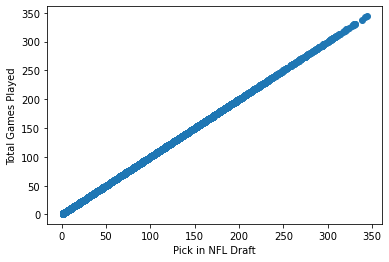

In [22]:
plt.scatter(no_outliers_df['Pick'], no_outliers_df['Games Played'])
plt.xlabel('Pick in NFL Draft')
plt.ylabel('Total Games Played')
plt.show()

## Check Normality

(array([2634.,  961.,  613.,  574.,  341.,  317.,  169.,  106.,   84.,
          24.]),
 array([  1. ,  35.3,  69.6, 103.9, 138.2, 172.5, 206.8, 241.1, 275.4,
        309.7, 344. ]),
 <BarContainer object of 10 artists>)

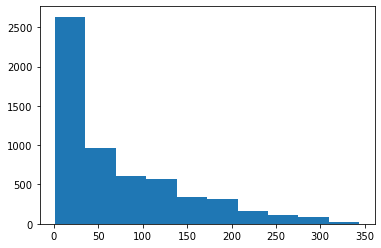

In [23]:
# Checking Distribution of Y variable
plt.hist(no_outliers_df['Games Played'])

### Shapiro Wilks Test

In [24]:
#Shapiro Wilks Test
from scipy.stats import shapiro

stat, pvalue = shapiro(no_outliers_df['Games Played'])
print(f'Statistics = {stat}, pvalue = {pvalue}')

#interpret Results
alpha =0.05
if pvalue > alpha:
    print('Sample looks normally distributed (fail to reject null hypothesis)')
else:
    print('Sample does not look normally distributed (reject null hypothesis)')

Statistics = 0.8421230316162109, pvalue = 0.0
Sample does not look normally distributed (reject null hypothesis)


/Users/ericdally/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/scipy/stats/morestats.py:1681: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


## Linear Regression ML Model

In [28]:
# Defining variables
X = no_outliers_df['Pick'].values.reshape(-1, 1)
y = no_outliers_df['Games Played']


In [26]:
y.shape

(5823,)

In [27]:
#Creating regression object
regr = linear_model.LinearRegression()
regr.fit(X, y)

ValueError: Expected 2D array, got 1D array instead:
array=[134  15 275 ...   4   2   2].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.